In [42]:
import math
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
from pprint import pprint
import json

In [43]:
import math

x1 = [1,1]
x2 = [5,1]
x3 = [4,4]

def distance(x,y,p=1):
    cnt = 0
    if len(x)==len(y) and len(x)>1:
        for i in range(len(x)):
            cnt += math.pow(abs(x[i]-y[i]), p)
    return math.pow(cnt, 1/p)

In [44]:
distance(x1, x2, p=1)

4.0

In [45]:
distance(x1, x3, p=1)

6.0

In [46]:
distance(x1, x3, p=2)

4.242640687119285

In [47]:
distance(x1, x3, p=3)

3.7797631496846193

In [48]:
distance(x1, x3, p=4)

3.5676213450081633

In [49]:
class KNN(object):
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        param n_neighbors 邻近点个数
        param p 距离度量
        """
        self.n_neighbors = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        knn_list = []
        for i in range(self.n_neighbors):
            iDist = np.linalg.norm(X-self.X_train[i], ord=self.p)
            knn_list.append((iDist, self.y_train[i]))
        for i in range(self.n_neighbors, len(self.X_train)):
            maxDistIndex = knn_list.index(max(knn_list, key=lambda x:x[0]))
            dist = np.linalg.norm(X-self.X_train[i], ord=self.p)
            if knn_list[maxDistIndex][0] > dist:
                knn_list[maxDistIndex] = (dist, self.y_train[i])
        knn = [k[-1] for k in knn_list]
        countPairs = Counter(knn)
        maxCount = sorted(countPairs, key=lambda x:x)[-1]
        return maxCount
    
    def score(self, X_test, y_test):
        rightCnt = 0
        for X,y in zip(X_test, y_test):
            label = self.predict(X)
            if label==y: rightCnt += 1
        return rightCnt/len(X_test)

In [50]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=[i.split(' (')[0].replace(' ','_') for i in iris.feature_names])
data['label'] = iris.target

In [51]:
X = np.array(data[data.columns.tolist()[:2]])
y = np.array(data.iloc[:,-1])
y = np.array([1 if i==0 else -1 for i in y])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [53]:
clf = KNN(X_train, y_train)

In [54]:
clf.score(X_test, y_test)

1.0

In [55]:
test = [6.2, 3.0]
clf.predict(test)

-1

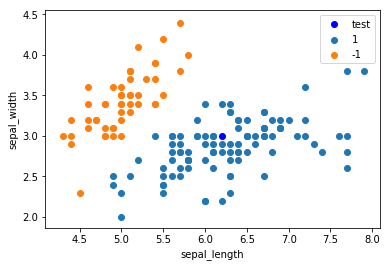

In [56]:
x, y = data.columns.tolist()[:2]
plt.scatter(data[data['label']!=0][x], data[data['label']!=0][y], label='1')
plt.scatter(data[data['label']==0][x], data[data['label']==0][y], label='-1')
plt.plot(test[0], test[1], 'bo', label='test')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
clf_skl = KNeighborsClassifier()
clf_skl.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
clf_skl.score(X_test, y_test)

1.0

In [60]:
clf_skl.predict(np.array(test).reshape(1,2))

array([-1])

In [61]:
sample = [(2,3),(5,4),(9,6),(4,7),(8,1),(7,2)]

In [62]:
sorted(sample, key=lambda x: x[0])

[(2, 3), (4, 7), (5, 4), (7, 2), (8, 1), (9, 6)]

In [115]:
import operator
from collections import defaultdict

def tree():
    return defaultdict(tree)

class KdTree(object):
    def __init__(self): 
        self.Node = tree()
    
    def getSplit(self, X):
        self.n = X.shape[1] if not isinstance(X, list) else len(X[0])
        varList = {}
        for i in range(self.n):
            varList[i] = np.var(list(map(lambda x:x[i], X)))
        maxVarIndex = max(varList, key=varList.get)
        return maxVarIndex
    
    def kdTree(self, X, curNode=None):
        if not X: return None
        index = self.getSplit(X)
        X = sorted(X ,key=operator.itemgetter(index))
        medIndex = len(X) // 2
        if curNode == None:
            self.Node['value'] = X[medIndex]
            self.Node['splitIndex'] = index
            self.Node['left'] = self.kdTree(X[:medIndex], self.Node['left'])
            self.Node['right'] = self.kdTree(X[medIndex+1:], self.Node['right'])
            return self.Node
        else:
            curNode['value'] = X[medIndex]
            curNode['splitIndex'] = index
            curNode['left'] = self.kdTree(X[:medIndex], curNode['left'])
            curNode['right'] = self.kdTree(X[medIndex+1:], curNode['right'])
            return curNode
    
    def kdFind(self, Node, target):
        """
        TODO: equals problem 
        """
        if not Node: return None
        if target[Node['splitIndex']] > Node['value'][Node['splitIndex']]:
            rNode = Node['right']
        else:
            rNode = Node['left']
        if not rNode.get('right') and not rNode.get('left'): return rNode
        else: return self.kdFind(rNode, target)

In [116]:
model = KdTree()
t2 = model.kdTree(sample)
t2

defaultdict(<function __main__.tree()>,
            {'value': (7, 2),
             'splitIndex': 0,
             'left': defaultdict(<function __main__.tree()>,
                         {'value': (5, 4),
                          'splitIndex': 1,
                          'left': defaultdict(<function __main__.tree()>,
                                      {'value': (2, 3),
                                       'splitIndex': 0,
                                       'left': None,
                                       'right': None}),
                          'right': defaultdict(<function __main__.tree()>,
                                      {'value': (4, 7),
                                       'splitIndex': 0,
                                       'left': None,
                                       'right': None})}),
             'right': defaultdict(<function __main__.tree()>,
                         {'value': (9, 6),
                          'splitIndex': 1,
            

In [117]:
model.kdFind(t2, (4,5))

defaultdict(<function __main__.tree()>,
            {'value': (4, 7), 'splitIndex': 0, 'left': None, 'right': None})